# Variational Bayesian in Gaussian Mixture Model (GMM)

In **variational Bayesian (variational Bayes, variational inference)**, the algorithm is based on lower bound (called, variational lower bound, evidence lower bound, or ELBO) and KL-divergence, and we aim to get the optimal lower bound by minimizing KL-divergence (i.e, minimizing the difference between distributions). Same as in [EM algorithms](./01-gmm-em-algorithm.ipynb), we also repeat cyclic optimization to get the optimal distribution.<br>
In this method, however, we apply Bayesian approach, in which we don't just infer the best values of parameters, but we instead infer the distribution of parameters.

Same as in [EM algorithms](./01-gmm-em-algorithm.ipynb), we consider $p(X)$ when $ X=\{\mathbf{x}_0, \ldots, \mathbf{x}_{N-1}\} $ is given.<br>
In variational Bayesian, we consider the distribution of parameters $q(\Theta)$, and approximate $q(\Theta)$ by $q(\Theta)=\prod_{i=0}^{M-1} q_i(\Theta_i)$, in which each $q_i(\Theta_i)$ is a sub group of parameters. By Bayesian approach, each $q_i(\Theta_i)$ will then be represented with the corresponding conjugate prior.

> Note : The conjugate prior is the distribution which has same expression between prior distribution and posterior distribution in Bayesian. For instance, the conjugate prior for parameters in Bernoulli distribution is known to be the beta distribution. (In exponential family, there always exists the conjugate prior.)

By applying above optimization (with evidence lower bound and KL-divergence), it's known that we can obtain the optimal $q_j^*(\Theta_j)$ as follows, for each $j$. (See Chapter 10 in "[Pattern Recognition and Machine Learning](https://www.microsoft.com/en-us/research/uploads/prod/2006/01/Bishop-Pattern-Recognition-and-Machine-Learning-2006.pdf?ranMID=24542&ranEAID=TnL5HPStwNw&ranSiteID=TnL5HPStwNw-g4zE85KQgCXaCQfYBhtuFQ&epi=TnL5HPStwNw-g4zE85KQgCXaCQfYBhtuFQ&irgwc=1&OCID=AID2200057_aff_7593_1243925&tduid=%28ir__vhvv9m6caokf6nb62oprh029if2xo0rux3ga300300%29%287593%29%281243925%29%28TnL5HPStwNw-g4zE85KQgCXaCQfYBhtuFQ%29%28%29&irclickid=_vhvv9m6caokf6nb62oprh029if2xo0rux3ga300300)" for reason.)

$ \ln q_j^*(\Theta_j) = \mathbb{E}_{i \neq j}[\ln p(X, \Theta)] + const \;\;\;\;\; (1) $

where $ \mathbb{E}_{i \neq j}[\cdot] $ is an expectation with respect to $q$ distribution, and then $ \mathbb{E}_{i \neq j}[\ln p(X, \Theta)]=\int \ln p(X, \Theta) \prod_{i \neq j} q_i d\Theta_i $

The equation (1) implies that you can obtain the expectation in some factor using the expectations of other factors.<br>
By setting initial expectations in (1), we can then update each expectation and repeat this cycle until we can get the optimal results.

> Note : Here I skip the explanation, but you can also evaluate the convergence during cyclic repeats by monitoring evidence lower bound (ELBO).

Now let's apply this method in Gaussian Mixture Models (GMM).

Gaussian Mixture Model (GMM) $ p(\mathbf{x}) = \sum^{K-1}_{k=0} \pi_k \mathcal{N}(\mathbf{x}|\mu_k, \Lambda_k^{-1}) $ is decomposed by categorical distribution $ p(\mathbf{z}) $, in which $ p(z_k=1)=\pi_k $ (where $\sum_k \pi_k = 1.0$), and the corresponding Gaussian distribution (normal distribution) with mean $ \mu=(\mu_0, \mu_1, \ldots, \mu_{K-1}) $ and precision $ \Lambda=(\Lambda_0, \Lambda_1, \ldots, \Lambda_{K-1}) $.<br>
This will be represented by the following graphical model.

![GMM Graphical Model](images/gmm_graphical_model02.png)

> Note : Here I denote by using precision matrices $\Lambda$ rather than covariance matrices $\Sigma$ used in EM algorithm.

In this graphical model, the distribution of $ X $ and $ Z $ will be given by using the condition $\pi$ as follows.

$ p(Z|\pi) = \prod_{n=0}^{N-1} \prod_{k=0}^{K-1} \pi_k^{z_{nk}} \;\;\;\;\; (2) $

$p(X|Z, \mu, \Lambda) = \prod_{n=0}^{N-1} \prod_{k=0}^{K-1} \mathcal{N}(x_n|\mu_k, \Lambda_k^{-1})^{z_{nk}} \;\;\;\;\; (3) $

In this graphical model, $\{ \pi, \mu, \Lambda \}$ are parameters and we'll represent these prior distributions in Bayesian.

First, $\pi$ is multinomial distribution, and it's known that the conjugate prior for this distribution is Dirichlet distribution $Dir(\cdot | \alpha)$. In variational Bayesian method in GMM, we set initial value $(\alpha_0, \ldots, \alpha_0)$ for $\alpha$ in this Dirichlet distribution.

$ p(\pi) = Dir(\pi|(\alpha_0, \ldots, \alpha_0)) = \frac{\Gamma(K \cdot \alpha_0)}{\Gamma(\alpha_0)\cdots\Gamma(\alpha_0)} \prod_{k=0}^{K-1} \pi_k^{\alpha_0-1} \;\;\;\;\; (4) $

where $\Gamma(\cdot)$ is Gamma function.

Next, we consider each Gaussian distribution components. It's known that the conjugate prior for mean and precision in multivariate Gaussian distribution is given by the following equation with Wishart distribution (which is called Gaussian-Wishart prior). Here we set initial values $\mathbf{m}_0, \beta_0, \nu_0$ and initial matrix $W_0$.

$ p(\mu, \Lambda) = p(\mu|\Lambda)p(\Lambda) = \prod_{k=0}^{K-1} \left\{ \mathcal{N}(\mu_k|\mathbf{m}_0,(\beta_0 \Lambda_k)^{-1}) \cdot \mathcal{W}(\Lambda_k|W_0,\nu_0) \right\} \;\;\;\;\; (5) $

where $\mathcal{W}(\cdot)$ is Wishart distribution.

As you can see above, $\mu$ depends on $\Lambda$ in conjugate prior and the graphical model will then be represented as follows.

![GMM Graphical Model](images/gmm_graphical_model03.png)

In variational Bayesian in Gaussian Mixture Model, we apply the following approximation.

$q(Z, \pi, \mu, \Lambda) = q(Z) q(\pi, \mu, \Lambda)$

As a result, the latter part in RHS (right-hand side) will be decomposed as follows.

$q(Z, \pi, \mu, \Lambda)$

$= q(Z) q(\pi, \mu, \Lambda)$

$= q(Z) q(\pi) q(\mu, \Lambda)$

$= q(Z) q(\pi) \prod_{k=0}^{K-1} q(\mu_k, \Lambda_k)$

Using the equation (1) and above conjugate prior, we can get the expression of optimal $q^*(Z)$, $q^*(\pi)$, and $q^*(\mu_k, \Lambda_k)$.

For instance, $q^*(Z)$ will be represented by :

$\ln q^*(Z)=\mathbb{E}_{\pi,\mu,\Lambda}[\ln p(X, Z, \pi, \mu, \Lambda)] + const$

Because $p(X, Z, \pi, \mu, \Lambda)=p(X|Z, \mu, \Lambda)p(Z|\pi)p(\pi)p(\mu,\Lambda)$ and only $p(X|Z, \mu, \Lambda)p(Z|\pi)$ depends on $Z$, it will then be :

$\ln q^*(Z)=\mathbb{E}_{\mu,\Lambda}[\ln p(X|Z, \mu, \Lambda)]+\mathbb{E}_{\pi}[\ln p(Z|\pi)] + const$

By applying (2) and (3) in above equation, you will obtain the following equation. (I note that the 4th term $\mathbb{E}_{\mu_k, \Lambda_k}[(\mathbf{x}_n - \mu_k)^T \Lambda_k (\mathbf{x}_n - \mu_k)]$ only depends on the input's index $n$.)

$\ln q^*(Z)=\sum_{n=0}^{N-1} \sum_{k=0}^{K-1} z_{nk} \rho_{nk} + const$

where $ \rho_{nk}=\mathbb{E}_{\pi_k}[\ln \pi_k] + \frac{1}{2} \mathbb{E}_{\Lambda_k}[\ln |\Lambda_k|] - \frac{D}{2} \ln(2\pi) - \frac{1}{2} \mathbb{E}_{\mu_k, \Lambda_k}[(\mathbf{x}_n - \mu_k)^T \Lambda_k (\mathbf{x}_n - \mu_k)] $ and $D$ is the number of dimension of input $\mathbf{x}$.

By normalizing the results, we will then obtain new (optimal) $q^*(Z)$ as follows.

$ q^*(Z) = \prod_{n=0}^{N-1} \prod_{k=0}^{K-1} r_{nk}^{z_{nk}} \;\;\;\;\; (6) $

where $r_{nk}=\frac{e^{\rho_{nk}}}{\sum_{j=0}^{K-1} e^{\rho_{nj}}}$

Here I skip detailed descriptions, but you can also obtain $q^*(\pi)$ and $q^*(\mu_k, \Lambda_k)$ by applying computation (transformation) as follows.<br>
(See Chapter 10 in "[Pattern Recognition and Machine Learning](https://www.microsoft.com/en-us/research/uploads/prod/2006/01/Bishop-Pattern-Recognition-and-Machine-Learning-2006.pdf?ranMID=24542&ranEAID=TnL5HPStwNw&ranSiteID=TnL5HPStwNw-g4zE85KQgCXaCQfYBhtuFQ&epi=TnL5HPStwNw-g4zE85KQgCXaCQfYBhtuFQ&irgwc=1&OCID=AID2200057_aff_7593_1243925&tduid=%28ir__vhvv9m6caokf6nb62oprh029if2xo0rux3ga300300%29%287593%29%281243925%29%28TnL5HPStwNw-g4zE85KQgCXaCQfYBhtuFQ%29%28%29&irclickid=_vhvv9m6caokf6nb62oprh029if2xo0rux3ga300300)".)

$ q^*(\pi)=Dir(\pi|\alpha) \;\;\;\;\; (7) $

where $\alpha = (\alpha_0 + N_0,\alpha_0 + N_1, \ldots, \alpha_0 + N_{K-1})$ and $N_k=\sum_{n=0}^{N-1} r_{nk}$

$ q^*(\mu_k, \Lambda_k) = \mathcal{N}(\mu_k|\mathbf{m}_k, (\beta_k \Lambda_k)^{-1}) \mathcal{W}(\Lambda_k|W_k,\nu_k) \;\;\;\;\; (8) $

where

$\beta_k = \beta_0 + N_k$

$\mathbf{m}_k = \frac{1}{\beta_k} (\beta_0 \mathbf{m}_0 + N_k \bar{\mathbf{x}_k})$

$W_k^{-1} = W_0^{-1} + \sum_{n=0}^{N-1} \left\{ r_{nk} ( \mathbf{x}_n - \bar{\mathbf{x}_k} ) ( \mathbf{x}_n - \bar{\mathbf{x}_k} )^T \right\} + \frac{\beta_0 N_k}{\beta_0 + N_k}(\bar{\mathbf{x}_k} - \mathbf{m}_0) (\bar{\mathbf{x}_k}-\mathbf{m}_0)^T$

$\nu_k = \nu_0 + N_k$

and $\bar{\mathbf{x}_k} = \frac{1}{N_k} \sum_{n=0}^{N-1} r_{nk} \mathbf{x}_n$

In variational Bayesian, we repeat the calculation of $r_{nk}$ and the updates of (6), (7), (8) to get the optimal parameters.

The obtained result (prediction function) will be given with the marginal distribution by parameters, and later you will find that it leads to well-known Student's t-distribution.<br>
When $N$ goes to infinity, the solution of variational Bayesian will go to the solution of EM algorithm.

In this example, we assume that $K$ (the number of components in GMM) is known, but even when you set a large number as $K$ in variational Bayesian method, there'll be no overfitting by Bayesian process. (See [here](https://tsmatz.wordpress.com/2017/09/13/overfitting-for-regression-and-deep-learning/) for details about overfitting.)

> Note : When you compare models in order to decide $K$ (see [information criterion](https://tsmatz.wordpress.com/2017/09/13/overfitting-for-regression-and-deep-learning/)), please take care for the variation of solutions.<br>
> See 10.2.4 in "[Pattern Recognition and Machine Learning](https://www.microsoft.com/en-us/research/uploads/prod/2006/01/Bishop-Pattern-Recognition-and-Machine-Learning-2006.pdf?ranMID=24542&ranEAID=TnL5HPStwNw&ranSiteID=TnL5HPStwNw-g4zE85KQgCXaCQfYBhtuFQ&epi=TnL5HPStwNw-g4zE85KQgCXaCQfYBhtuFQ&irgwc=1&OCID=AID2200057_aff_7593_1243925&tduid=%28ir__vhvv9m6caokf6nb62oprh029if2xo0rux3ga300300%29%287593%29%281243925%29%28TnL5HPStwNw-g4zE85KQgCXaCQfYBhtuFQ%29%28%29&irclickid=_vhvv9m6caokf6nb62oprh029if2xo0rux3ga300300)" for details.

Now let's start to implement this algorithm and see the result.

*back to [Readme](https://github.com/tsmatz/gmm/)*

##  Generate sample data (Sampling)

I generate sample data (observations) by using the distribution of GMM.<br>
In this example, I will generate 1000 samples of $ \sum_{k=0}^2 \pi_k \mathcal{N}(\mathbf{x}_n|\mu_k, \Lambda_k^{-1}) $ (i.e, $ K=3 $) where :

$ \pi_0=0.15, \pi_1=0.35, \pi_2=0.5 $

$ \mu_0=(-3.0, 2.0), \mu_1=(4.0, 2.0), \mu_2=(3.0, 1.0) $

$\Lambda_0=\begin{bmatrix} 1.020 & -0.102 \\ -0.102 & 0.510 \end{bmatrix}$ (i.e, $ \Sigma_0=\begin{bmatrix} 1.0 & 0.2 \\ 0.2 & 2.0 \end{bmatrix} $)

$\Lambda_1=\begin{bmatrix} 32.500 & 25.000 \\ 25.000 & 20.000 \end{bmatrix}$ (i.e, $ \Sigma_1=\begin{bmatrix} 0.8 & -1.0 \\ -1.0 & 1.3 \end{bmatrix} $)

$\Lambda_2=\begin{bmatrix} 5.172 & -4.828 \\ -4.828 & 5.172 \end{bmatrix}$ (i.e, $ \Sigma_2=\begin{bmatrix} 1.5 & 1.4 \\ 1.4 & 1.5 \end{bmatrix} $)

This is the same example in [EM algorithms](./01-gmm-em-algorithm.ipynb), but here I denote with precision $\Lambda_k$, instead of covariance $\Sigma_k$.

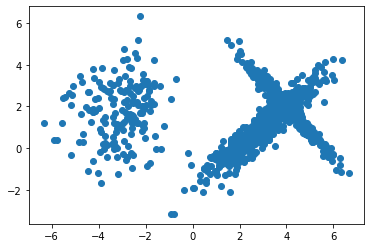

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1000)  # For debugging and reproducibility

N = 1000
D = 2

pi1=0.15; pi2=0.35; pi3=0.5

mu1=np.array([-3.0, 2.0])
mu2=np.array([4.0, 2.0])
mu3=np.array([3.0, 1.0])

Sigma1 = np.array([
    [1.0,0.2],
    [0.2,2.0],
])
Sigma2 = np.array([
    [0.8,-1.0],
    [-1.0,1.3],
])
Sigma3 = np.array([
    [1.5,1.4],
    [1.4,1.5],
])

Z_seeds = np.random.uniform(0, 1, size=N)
X = np.empty((0,2))
for z_seed in Z_seeds:
    if z_seed < pi1:
        x_n = np.random.multivariate_normal(
            mean=mu1,
            cov=Sigma1,
            size=1)
    elif z_seed < pi1 + pi2:
        x_n = np.random.multivariate_normal(
            mean=mu2,
            cov=Sigma2,
            size=1)
    else:
        x_n = np.random.multivariate_normal(
            mean=mu3,
            cov=Sigma3,
            size=1)
    X = np.vstack((X, x_n))

plt.plot(X[:,0], X[:,1], "o")

## Apply variational Bayesian (variational inference) in Python

Now let's implement variational Bayesian (variational inference) in Python and estimate the distribution of parameters $q(\pi)=Dir(\pi|\alpha)$ and $q(\mu_k, \Lambda_k) = \mathcal{N}(\mu_k|\mathbf{m}_k, (\beta_k \Lambda_k)^{-1}) \mathcal{W}(\Lambda_k|W_k,\nu_k) \;\; (k=0,1,2)$.

### 1. Initialize parameters

First, we set initial values $ \alpha_0, W_0, \nu_0, m_0, \beta_0 $ as follows.<br>
($W_k$ should be symmetric and positive definite matrix and $\nu_k$ should be $\nu_k \geq D$.)

- $\alpha_0 = 1.5$
- $W_0 = \begin{bmatrix} 3.0 & 1.0 \\ 1.0 & 4.0 \end{bmatrix}$
- $\nu_0 = 2.0$
- $\mathbf{m}_0 = \begin{bmatrix} 1.0 \\ 1.0 \end{bmatrix}$
- $\beta_0 = 1.5$

I note that you should set different values for initial $m_k$ in order to make convergence. (When you set the same values for $k=0,1,2$, it will stuck into the same value.)<br>
In this example, I have added Gaussian noise for initial $m_0$.

In [2]:
K = 3

# Initialize parameters
class DistParams:
    alpha = np.empty((0,K))
    W = np.empty((0,K,2,2))
    nu = np.empty((0,K))
    m = np.empty((0,K,2))
    beta = np.empty((0,K))

    def __init__(self, alpha_0, W_0, nu_0, m_0, beta_0):
        # Memory initial values
        self.alpha_0 = alpha_0
        self.W_0 = W_0
        self.nu_0 = nu_0
        self.m_0 = m_0
        self.beta_0 = beta_0

        # Memory current values to compute r
        # But, in order to make convergence, set different values for initial m
        self.alpha = np.array([alpha_0] * K)
        self.W = np.array([W_0] * K)
        self.nu = np.array([nu_0] * K)
        self.m = np.random.multivariate_normal(
            m_0,
            [[1.0, 0.0],[0.0, 1.0]],
            size=K)
        self.beta = np.array([beta_0] * K)

dist_params = DistParams(
    alpha_0=1.5,
    W_0=np.array([[1.0, 0.0],[0.0, 1.0]]),
    nu_0=2.0,
    m_0=np.array([1.0, 1.0]),
    beta_0=1.5
)

### 2. Compute $r_{nk}$

Next we get the following $r_{nk}$ :

$$ r_{nk}=\frac{e^{\rho_{nk}}}{\sum_{j=0}^{K-1} e^{\rho_{nj}}} $$

where $ \rho_{nk}=\mathbb{E}_{\pi_k}[\ln \pi_k] + \frac{1}{2} \mathbb{E}_{\Lambda_k}[\ln |\Lambda_k|] - \frac{D}{2} \ln(2\pi) - \frac{1}{2} \mathbb{E}_{\mu_k, \Lambda_k}[(\mathbf{x}_n - \mu_k)^T \Lambda_k (\mathbf{x}_n - \mu_k)] $ and $D=2$

In this equation, we can obtain expectations by the following formula. (See "Appendix B" in "[Pattern Recognition and Machine Learning](https://www.microsoft.com/en-us/research/uploads/prod/2006/01/Bishop-Pattern-Recognition-and-Machine-Learning-2006.pdf?ranMID=24542&ranEAID=TnL5HPStwNw&ranSiteID=TnL5HPStwNw-g4zE85KQgCXaCQfYBhtuFQ&epi=TnL5HPStwNw-g4zE85KQgCXaCQfYBhtuFQ&irgwc=1&OCID=AID2200057_aff_7593_1243925&tduid=%28ir__vhvv9m6caokf6nb62oprh029if2xo0rux3ga300300%29%287593%29%281243925%29%28TnL5HPStwNw-g4zE85KQgCXaCQfYBhtuFQ%29%28%29&irclickid=_vhvv9m6caokf6nb62oprh029if2xo0rux3ga300300)" for expectations in Dirichlet distribution and Wishart distribution.)

1. $\mathbb{E}_{\pi_k}[\ln \pi_k] = \psi(\alpha_k) - \psi(\sum_k \alpha_k)$
2. $\mathbb{E}_{\Lambda_k}[\ln |\Lambda_k|] = \sum_{i=1}^D \psi \left( \frac{\nu_k + 1 - i}{2} \right) + D \ln 2 + \ln |W_k| $
3. $\mathbb{E}_{\mu_k, \Lambda_k}[(\mathbf{x}_n - \mu_k)^T \Lambda_k (\mathbf{x}_n - \mu_k)]=\frac{D}{\beta_k}+\nu_k (\mathbf{x}_n - \mathbf{m}_k)^T W_k (\mathbf{x}_n - \mathbf{m}_k)$

where $\psi(\cdot)$ is digamma function and $D=2$.

In [3]:
import math
from scipy.special import digamma

def get_expectation01(alpha):
    return digamma(alpha) - digamma(alpha.sum())

def get_expectation02(nu, W):
    t1 = sum(digamma((nu + 1.0 - (i+1)) / 2.0) for i in range(D))
    t2 = D * np.log(2)
    t3 = np.log(np.linalg.det(W))
    return t1 + t2 + t3

def get_expectation03(X, beta, nu, m, W):
    def compute_exp03(x_n, beta_k, nu_k, m_k, W_k):
        t1 = D / beta_k
        t2 = np.dot(np.matmul(x_n - m_k, W_k), x_n - m_k) * nu_k
        return t1 + t2
    return np.array([[compute_exp03(x, beta[k], nu[k], m[k], W[k]) for k in range(K)] for x in X])

def get_rho(arg_dist_params):
    exp1 = get_expectation01(arg_dist_params.alpha)
    exp2 = get_expectation02(arg_dist_params.nu, arg_dist_params.W)
    exp3 = get_expectation03(
        X,
        arg_dist_params.beta,
        arg_dist_params.nu,
        arg_dist_params.m,
        arg_dist_params.W
    )
    def compute_rho(exp1_k, exp2_k, exp3_nk):
        return exp1_k + exp2_k / 2.0 - D * np.log(2.0 * math.pi) / 2.0 - exp3_nk / 2.0

    return np.array([[compute_rho(exp1[k], exp2[k], exp3[n][k]) for k in range(K)] for n in range(N)])

def get_r(rho):
    rho_exp = np.exp(rho)
    return np.array([rho_exp[n]/rho_exp[n].sum() for n in range(N)])

### 3. Compute new $\alpha_k$

Using above $r_{nk}$, we can get new $\alpha_k$ as follows (which then constructs the Dirichlet distribution $q^*(\pi)$).

$\alpha_k = \alpha_0 + N_k$

where $N_k=\sum_{n=0}^{N-1} r_{nk}$

In [4]:
def get_Nk_arr(r):
    return r.sum(axis=0)

def get_alpha(alpha_0, Nk_arr):
    return alpha_0 + Nk_arr

### 4. Compute new $\beta_k$

New $\beta_k$ (which consists of new Gaussian-Wishart distribution $q^*(\mu_k, \Lambda_k)$) is also obtained as follows.

$\beta = \beta_0 + N_k$

In [5]:
def get_beta(beta_0, Nk_arr):
    return beta_0 + Nk_arr

### 5. Compute new $\mathbf{m}_k$

New $\mathbf{m}_k$ (which also consists of new Gaussian-Wishart distribution $q^*(\mu_k, \Lambda_k)$) is obtained as follows.

$\mathbf{m}_k = \frac{1}{\beta_k} (\beta_0 \mathbf{m}_0 + N_k \bar{\mathbf{x}_k})$

where $\bar{\mathbf{x}_k} = \frac{1}{N_k} \sum_{n=0}^{N-1} r_{nk} \mathbf{x}_n$

In [6]:
def get_xk_arr(X, r, Nk_arr):
    def r_by_x(X_arg, r_k):
        return np.array([(r_k[n] * X_arg[n]) for n in range(N)])
    numer = np.array([r_by_x(X, r[ :,k]).sum(axis=0) for k in range(K)])
    return np.array([numer[k]/Nk_arr[k] for k in range(K)])

def get_m(m_0, beta_0, beta, Nk_arr, xk_arr):
    numer = np.array([(beta_0 * m_0 + Nk_arr[k] * xk_arr[k]) for k in range(K)])
    return np.array([numer[k]/beta[k] for k in range(K)])

### 6. Compute new $W_k$

New $W_k$ (which also consists of new Gaussian-Wishart distribution $q^*(\mu_k, \Lambda_k)$) is given as follows.

$W_k^{-1} = W_0^{-1} + \sum_{n=0}^{N-1} \left\{ r_{nk} ( \mathbf{x}_n - \bar{\mathbf{x}_k} ) ( \mathbf{x}_n - \bar{\mathbf{x}_k} )^T \right\} + \frac{\beta_0 N_k}{\beta_0 + N_k}(\bar{\mathbf{x}_k} - \mathbf{m}_0) (\bar{\mathbf{x}_k}-\mathbf{m}_0)^T$

In [7]:
def get_W_inverse(X, W_0, r, beta_0, m_0, Nk_arr, xk_arr):
    t1 = np.linalg.inv(W_0)
    def t2_n(r_n_k, X_n, xk_arr_k):
        v = np.array([X_n - xk_arr_k])
        v_t = v.transpose()
        return r_n_k * np.matmul(v_t, v)
    def t2_k(r_k, X, xk_arr_k):
        v = np.array([t2_n(r_k[n], X[n], xk_arr_k) for n in range(N)])
        return v.sum(axis=0)
    t2 = np.array([t2_k(r[ :,k], X, xk_arr[k]) for k in range(K)])
    def t3_k(xk_arr_k, m_0, Nk_arr_k, beta_0):
        v = np.array([xk_arr_k - m_0])
        v_t = v.transpose()
        return np.matmul(v_t, v) * beta_0 * Nk_arr_k / (beta_0 + Nk_arr_k)
    t3 = np.array([t3_k(xk_arr[k], m_0, Nk_arr[k], beta_0) for k in range(K)])
    return np.array([(t1 + t2[k] + t3[k]) for k in range(K)])

### 7. Compute new $\nu_k$

New $\nu_k$ (which consists of new Gaussian-Wishart distribution $q^*(\mu_k, \Lambda_k)$) is also obtained as follows.

$\nu_k = \nu_0 + N_k$

In [8]:
def get_nu(nu_0, Nk_arr):
    return nu_0 + Nk_arr

### 8. Put it all together

Now we put it all together and run algorithm.

In this example, the number of loop is the fixed value. However, by monitoring **variational lower bound** (also called, evidence lower bound or ELBO), you can also evaluate the convergence in variational Bayesian.<br>
See 10.2.2 in "[Pattern Recognition and Machine Learning](https://www.microsoft.com/en-us/research/uploads/prod/2006/01/Bishop-Pattern-Recognition-and-Machine-Learning-2006.pdf?ranMID=24542&ranEAID=TnL5HPStwNw&ranSiteID=TnL5HPStwNw-g4zE85KQgCXaCQfYBhtuFQ&epi=TnL5HPStwNw-g4zE85KQgCXaCQfYBhtuFQ&irgwc=1&OCID=AID2200057_aff_7593_1243925&tduid=%28ir__vhvv9m6caokf6nb62oprh029if2xo0rux3ga300300%29%287593%29%281243925%29%28TnL5HPStwNw-g4zE85KQgCXaCQfYBhtuFQ%29%28%29&irclickid=_vhvv9m6caokf6nb62oprh029if2xo0rux3ga300300)"

In [9]:
for loop in range(50):
    print("Running iteration {} ...".format(loop + 1), end="\r")
    # Get r
    l_rho = get_rho(dist_params)
    l_r = get_r(l_rho)
    # Get N_k
    l_N_k = get_Nk_arr(l_r)
    # Get new alpha
    l_alpha = get_alpha(dist_params.alpha_0, l_N_k)
    # Get new beta
    l_beta = get_beta(dist_params.beta_0, l_N_k)
    # Get bar_x_k
    l_x_k = get_xk_arr(X, l_r, l_N_k)
    # Get new m
    l_m = get_m(dist_params.m_0, dist_params.beta_0, l_beta, l_N_k, l_x_k)
    # Get new W
    l_W_inv = get_W_inverse(X, dist_params.W_0, l_r, dist_params.beta_0, dist_params.m_0, l_N_k, l_x_k)
    l_W = np.array([np.linalg.inv(l_W_inv[k]) for k in range(K)])
    # Get new nu
    l_nu = get_nu(dist_params.nu_0, l_N_k)

    # Replace current params for r
    dist_params.alpha = l_alpha
    dist_params.W = l_W
    dist_params.nu = l_nu
    dist_params.m = l_m
    dist_params.beta = l_beta

print("\nDone")

Running iteration 50 ...
Done


## Compare result

Let's compare and see the estimated results.<br>
(In order to simplify the comparison for you, here I have changed the order of components.)

Our actual value of mean in GMM is $ \mu_2=(3.0, 1.0), \mu_1=(4.0, 2.0), \mu_0=(-3.0, 2.0) $.<br>
The mean value in the estimated distribution is as follows.

In [10]:
dist_params.m

array([[ 2.87714931,  0.89628928],
       [ 4.03070604,  1.91857709],
       [-3.05747205,  1.78215033]])

Our actual values of precision in GMM is :

$\Lambda_2=\begin{bmatrix} 5.172 & -4.828 \\ -4.828 & 5.172 \end{bmatrix}$

$\Lambda_1=\begin{bmatrix} 32.500 & 25.000 \\ 25.000 & 20.000 \end{bmatrix}$

$\Lambda_0=\begin{bmatrix} 1.020 & -0.102 \\ -0.102 & 0.510 \end{bmatrix}$

The precision matrix in the estimated distribution is as follows, since the expected precision $\mathbb{E}[\Lambda_k]$ in Wishart distribution $\mathcal{W}(\Lambda_k|W_k,\nu_k)$ is $\nu_k W_k$.

In [11]:
[dist_params.nu[k] * dist_params.W[k] for k in range(K)]

[array([[ 4.54908732, -4.22230989],
        [-4.22230989,  4.55028156]]),
 array([[8.82139854, 6.67928398],
        [6.67928398, 5.85625664]]),
 array([[ 0.78310269, -0.06362062],
        [-0.06362062,  0.51515316]])]

Our actual probability $\pi$ in each GMM components is $ \pi_2=0.5, \pi_1=0.35, \pi_0=0.15 $.<br>
The estimated probability is as follows, since the expectation $\mathbb{E}[\pi_k]$ of component $k$ in Dirichlet distribution $Dir(\pi|\alpha)$ is $\frac{\alpha_k}{\sum_k \alpha_k}$.

In [12]:
np.set_printoptions(suppress=True)
dist_params.alpha / dist_params.alpha.sum()

array([0.46797179, 0.35129235, 0.18073586])

In this distribution, the predictive density $p(\hat{x})$ will be given by marginal distribution as follows.

$$ p(\hat{x} | X) = \sum_{k=0}^{K-1} \int \int \int \pi_k \mathcal{N}(\hat{x}|\mu_k, \Lambda_k^{-1}) p(\pi, \mu, \Lambda | X) d\pi \; d\mu \; d\Lambda $$

This distribution can be approximated by the mixture of Student's t-distributions as follows. (This will meet the well-known fact that marginal distribution of Gaussian distribution in Bayesian is a Student's t-distribution.)<br>
When $N \to \infty$, the mixture of this Student's t-distributions will go to the mixture of Gaussian ditsirbution (i.e, GMM).

$$ p(\hat{x} | X) = \frac{1}{\sum_k \alpha_k} \sum_{k=1}^{K-1} \alpha_k St \left( \hat{x} \; \middle| \; \mathbf{m}_k, \frac{(\nu_k + 1 - D) \beta_k}{(1+\beta_k)} W_k, \nu_k + 1 - D \right) $$

> Note : See 10.2.3 in "[Pattern Recognition and Machine Learning](https://www.microsoft.com/en-us/research/uploads/prod/2006/01/Bishop-Pattern-Recognition-and-Machine-Learning-2006.pdf?ranMID=24542&ranEAID=TnL5HPStwNw&ranSiteID=TnL5HPStwNw-g4zE85KQgCXaCQfYBhtuFQ&epi=TnL5HPStwNw-g4zE85KQgCXaCQfYBhtuFQ&irgwc=1&OCID=AID2200057_aff_7593_1243925&tduid=%28ir__vhvv9m6caokf6nb62oprh029if2xo0rux3ga300300%29%287593%29%281243925%29%28TnL5HPStwNw-g4zE85KQgCXaCQfYBhtuFQ%29%28%29&irclickid=_vhvv9m6caokf6nb62oprh029if2xo0rux3ga300300)" for details.